# Python notebook to reproduce _Supplementary Figure 8_

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

import plot_settings
import plot_utils

In [3]:
fig_dir = 'supplementary/figure_8/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# Code to reproduce Supplementary Figure 8

Supplementary Fig. 8

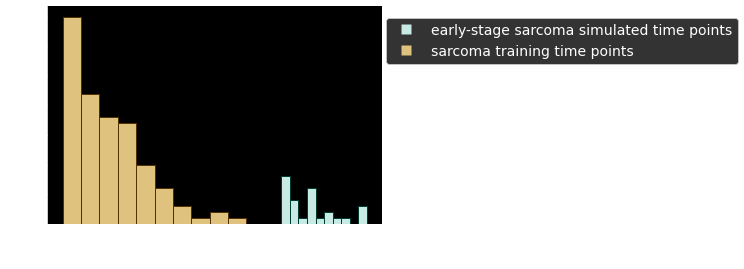

In [11]:
%matplotlib inline

measured_ts = np.loadtxt('results/TCGA/measured_sarcoma_survival_times.txt')
gen_ts = np.loadtxt('results/TCGA/extrapolated_sarcoma_survival_times.txt')

meas_col = plot_settings.get_sag_vs_baseline_colors('baseline')
extrap_col = plot_settings.get_sag_vs_baseline_colors('Sagittarius')

ax = plot_settings.get_wider_axis()
plot_utils.histogram(ax, measured_ts, 'Survival time', 'Count',
                     color=meas_col, edge_color=plot_settings.get_model_colors('cvae'))

plot_utils.histogram(ax, gen_ts, 'SARC survival time', 'Count',
                     color=extrap_col, edge_color=plot_settings.get_model_colors('mTAN'))

labels = ['early-stage sarcoma simulated time points', 'sarcoma training time points']
lp = lambda i: plt.plot([],color=[extrap_col, meas_col][i], ms=10, 
                        mec="none", label=labels[i], ls="", 
                        marker="s")[0]
handles = [lp(i) for i in range(2)]

plot_utils.format_legend(ax, handles, labels)
plot_utils.put_legend_outside_plot(ax, anchorage=(0.99, 0.98))

plot_utils.format_ax(ax)

plt.savefig(fig_dir + 'figure_8.pdf')